# Machine Learning - Predicting Treatment Abandonment with scikit learn
By **Daniel Palacio** (github.com/palaciodaniel) - 2020

## Cancelled Step - Using a Decision Tree

My original idea was also to use a Decision Tree Classifier, however this model performed slighty worse. Even using Grid Search did not help to improve it, and actually the recommended parameters decreased the metrics' values. The current results were obtained by simply varying the *max_depth* parameter until I found the optimal number...

For these reasons, you do not actually need to keep reading; the project ended at Step 4. I only uploaded this Notebook in case someone wants to check how to easily plot a tree.

In [1]:
# Importing required libraries

from sklearn.tree import DecisionTreeClassifier

import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

In [2]:
# Loading prepared DataFrame (only numeric values)

df = pd.read_csv("df_prepared.csv", header = 0, index_col = 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        100 non-null    int64
 1   Sex_Male                   100 non-null    int64
 2   Victimhood                 100 non-null    int64
 3   Discipline_Low             100 non-null    int64
 4   Discipline_Medium          100 non-null    int64
 5   Discipline_High            100 non-null    int64
 6   Introspection_Low          100 non-null    int64
 7   Introspection_Medium       100 non-null    int64
 8   Introspection_High         100 non-null    int64
 9   Motivation_Low             100 non-null    int64
 10  Motivation_Medium          100 non-null    int64
 11  Motivation_High            100 non-null    int64
 12  Neuroticism_Low            100 non-null    int64
 13  Neuroticism_Medium         100 non-null    int64
 14  Neuroticism_High           

### Final preparations

In [3]:
# Feature columns

X = df.iloc[:,:-1].to_numpy()
print(X[:5])

[[67  1  0  0  1  0  0  0  1  0  1  0  0  1  0  1  0  0  0  1  0]
 [35  0  0  0  1  0  1  0  0  0  0  1  1  0  0  1  0  0  0  1  0]
 [25  0  0  0  0  1  1  0  0  1  0  0  1  0  0  1  0  0  0  1  0]
 [48  0  0  0  0  1  0  1  0  0  0  1  1  0  0  0  0  1  1  0  0]
 [48  1  1  0  1  0  0  1  0  0  1  0  1  0  0  1  0  0  0  0  1]]


In [4]:
# Target column

y = df.iloc[:,-1].to_numpy()
print(y[:5])

[0 1 0 1 0]


In [5]:
# Dividing between training and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

print("X_train:", X_train.shape, type(y_test))
print("X_test:", X_test.shape, type(y_test))
print("y_train:", y_train.shape, type(y_test))
print("y_test:", y_test.shape, type(y_test))

X_train: (80, 21) <class 'numpy.ndarray'>
X_test: (20, 21) <class 'numpy.ndarray'>
y_train: (80,) <class 'numpy.ndarray'>
y_test: (20,) <class 'numpy.ndarray'>


### Model application

In [6]:
# Instantiating and fitting a Decision Tree classifier

dec_tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

In [7]:
# Making predictions with the Decision Tree classifier

y_pred = dec_tree.predict(X_test)
print("y_pred:", y_pred.shape, y_pred)
print("y_test:", y_test.shape, y_test)

y_pred: (20,) [1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1]
y_test: (20,) [1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0]


In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

[Text(472.15384615384613, 332.955, 'Discipline_Low <= 0.5\ngini = 0.492\nsamples = 100.0%\nvalue = [0.562, 0.438]\nclass = Abandoned'),
 Text(171.69230769230768, 237.825, 'Age <= 25.5\ngini = 0.45\nsamples = 51.2%\nvalue = [0.341, 0.659]\nclass = Finished'),
 Text(85.84615384615384, 142.695, 'gini = 0.0\nsamples = 5.0%\nvalue = [1.0, 0.0]\nclass = Abandoned'),
 Text(257.53846153846155, 142.695, 'Sex_Male <= 0.5\ngini = 0.394\nsamples = 46.2%\nvalue = [0.27, 0.73]\nclass = Finished'),
 Text(171.69230769230768, 47.565, 'gini = 0.236\nsamples = 27.5%\nvalue = [0.136, 0.864]\nclass = Finished'),
 Text(343.38461538461536, 47.565, 'gini = 0.498\nsamples = 18.8%\nvalue = [0.467, 0.533]\nclass = Finished'),
 Text(772.6153846153845, 237.825, 'Motivation_High <= 0.5\ngini = 0.326\nsamples = 48.8%\nvalue = [0.795, 0.205]\nclass = Abandoned'),
 Text(600.9230769230769, 142.695, 'Age <= 74.0\ngini = 0.219\nsamples = 40.0%\nvalue = [0.875, 0.125]\nclass = Abandoned'),
 Text(515.0769230769231, 47.565,

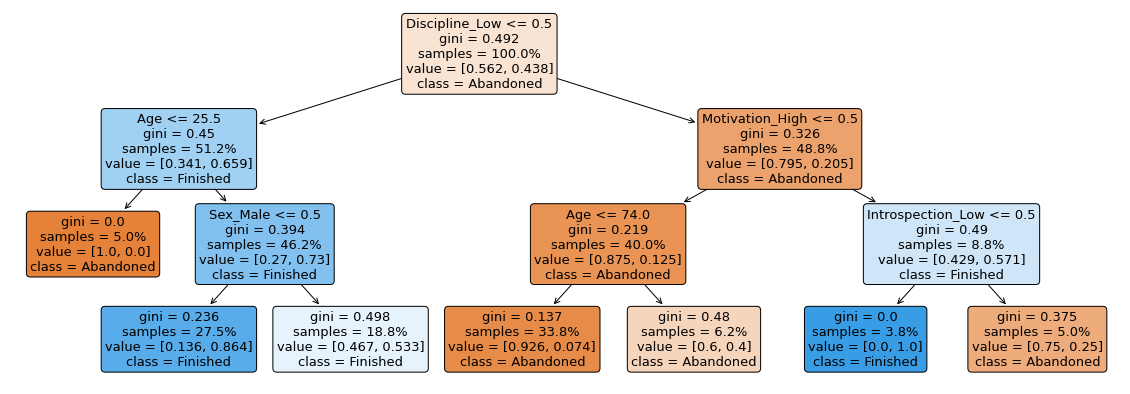

In [9]:
# Plotting the tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,7))
plot_tree(dec_tree, feature_names = df.columns, class_names = ["Abandoned", "Finished"], \
         filled = True, rounded = True, proportion = True, fontsize = 13)


### Scores

In [10]:
# Accuracy, recall and precision scores
print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))
print("Precision", round(precision_score(y_test,y_pred), 2))
print("Recall:", round(recall_score(y_test,y_pred), 2))

Accuracy: 0.65
Precision 0.71
Recall: 0.77


In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 3  4]
 [ 3 10]]


In [12]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)

True Positives: 10
True Negatives: 3
False Positives: 4
False Negatives: 3


In [13]:
# Cross Validation Score
scores = cross_val_score(dec_tree, X, y, cv=5)
print("Cross Validation Accuracy Scores:", scores)

Cross Validation Accuracy Scores: [0.85 0.85 0.7  0.6  0.55]
